In [1]:
#Imports
from nn import nn
import numpy as np
import sklearn
from typing import List, Dict, Tuple, Union
from numpy.typing import ArrayLike
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt

In [2]:
#Get digits dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets
y_onehot=np.zeros((y.shape[0],10))
y_onehot[np.arange(y.shape[0]),y["class"]]=1

In [3]:
# Sample 80/20 train/test split
train_idx=np.random.randint(0,len(X)-1,int(len(X)*0.8))
train_X=np.array(X.iloc[list(train_idx),:])
train_y=np.array(y_onehot[train_idx])
test_idx=set(range(len(X)))-set(train_idx)
test_X=np.array(X.iloc[list(test_idx),:])
test_y=np.array(y_onehot[list(test_idx)])

In [9]:
#Initialize NN
NNet=nn.NeuralNetwork(
    nn_arch=[{'input_dim':64,'output_dim':16,'activation':"relu"},{'input_dim':16,'output_dim':64,'activation':"sigmoid"},{'input_dim':64,'output_dim':10,"activation":"sigmoid"}],
    lr=0.0005,
    seed=37,
    batch_size=50,
    epochs=60,
    loss_function="BCE"
)

In [10]:
# Train NN
(train_error,val_error)=NNet.fit(train_X,train_y,test_X,test_y)

Done with iteration 0. Train error: 1.01 Val error: 0.95
Done with iteration 1. Train error: 0.96 Val error: 0.9
Done with iteration 2. Train error: 0.9 Val error: 0.85
Done with iteration 3. Train error: 0.85 Val error: 0.81
Done with iteration 4. Train error: 0.81 Val error: 0.77
Done with iteration 5. Train error: 0.77 Val error: 0.74
Done with iteration 6. Train error: 0.74 Val error: 0.71
Done with iteration 7. Train error: 0.69 Val error: 0.68
Done with iteration 8. Train error: 0.68 Val error: 0.66
Done with iteration 9. Train error: 0.66 Val error: 0.63
Done with iteration 10. Train error: 0.63 Val error: 0.61
Done with iteration 11. Train error: 0.61 Val error: 0.6
Done with iteration 12. Train error: 0.6 Val error: 0.58
Done with iteration 13. Train error: 0.57 Val error: 0.57
Done with iteration 14. Train error: 0.56 Val error: 0.55
Done with iteration 15. Train error: 0.55 Val error: 0.54
Done with iteration 16. Train error: 0.54 Val error: 0.53
Done with iteration 17. Trai

Text(0, 0.5, 'Loss')

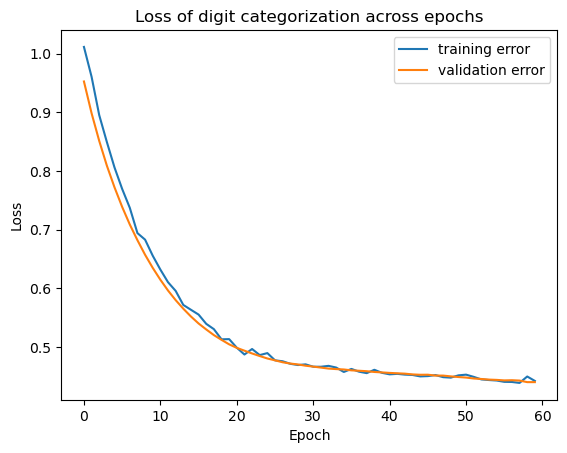

In [11]:
plt.plot(range(NNet._epochs),list(train_error))
plt.plot(range(NNet._epochs),list(val_error))
plt.legend(["training error","validation error"])
plt.title("Loss of digit categorization across epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")

1. Quantify the average reconstruction error:
By the end of 60 epochs, the classifier seems to be able to classify handwritten digits in the validation set with about 56% accuracy. This suggests that the model could benefit from a few more layers after the autoencoder layers, since the error is quite high.
2. Explain your choice of hyperparameters
I chose to use binary cross entropy to calculate loss on one-hot encoded digits because the one-hot encoding should turn the problem into a classification problem. I chose to one-hot encode the data because the labels are more categorical than ordinal, since predicting a 4 instead of a 5 is not better/worse than predicting a 3 instead of a 5. I tuned the learning rate by training the model at different learning rates and choosing the learning rate and number of epochs that minimized the error at the end while minimizing the number of epochs we need to calculate.